In [2]:
#Logistic regression is one of the techniques used for classification
#Classification Types
    #Yes no -> Binary Classification
    #more than 2 -> Multiclass Classification

import pandas as pd
from matplotlib import pyplot as plt
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv'
%matplotlib inline

In [3]:
df = pd.read_csv(url)
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


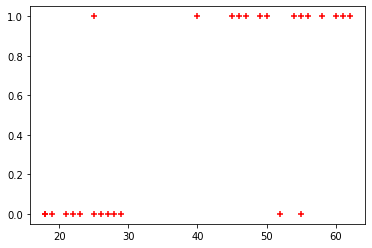

In [5]:
plt.scatter(df['age'], df['bought_insurance'], marker='+', color='red')

In [8]:
print(df.shape)
#Let split our data
from sklearn.model_selection import train_test_split

(27, 2)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [42]:
X_test

,age
5,56
23,45
2,47


In [43]:
#İmport Sigmoid

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [44]:
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
model.predict(X_test)

array([1, 1, 1], dtype=int64)

In [48]:
model.score(X_test,y_test)

1.0

In [51]:
#It gives no-yes probability
model.predict_proba(X_test)

array([[0.12818292, 0.87181708],
       [0.36871136, 0.63128864],
       [0.31248138, 0.68751862]])

In [55]:
#Exercise

# what we do ; we have complicated csv file  
# and we dont know which variables effects 'left' condition
# 1- Find out affect  
# 2- define X-y
# 3- split data
# 4- build logistic regression 




import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv"

In [2]:
df = pd.read_csv(url)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


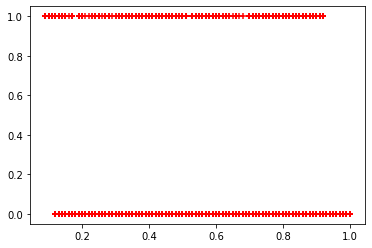

In [3]:
plt.scatter(df['satisfaction_level'], df['left'], marker='+', color='red')

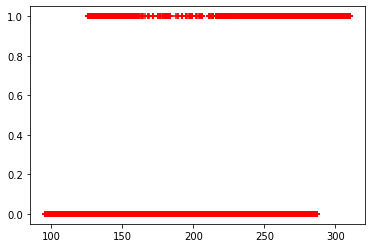

In [4]:
plt.scatter(df['average_montly_hours'], df['left'], marker='+', color='red')

In [5]:
#Data Exploration and visulation
left = df[df.left==1]
left.shape

(3571, 10)

In [6]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


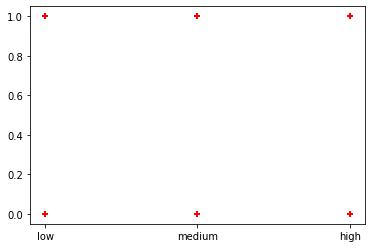

In [8]:
#From above table we can draw following conclusions,

#**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
#**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
#**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm
plt.scatter(df['salary'], df['left'], marker='+', color='red')

<AxesSubplot:xlabel='salary'>

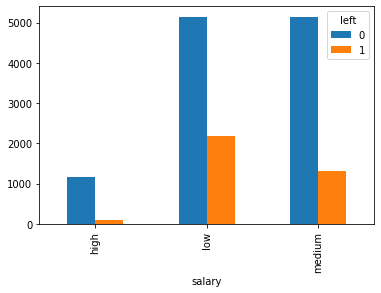

In [36]:
#Impact of salary on employee retention
pd.crosstab(df.salary,df.left).plot(kind='bar')
#Above bar chart shows employees with high salaries are likely to not leave the company

<AxesSubplot:xlabel='Department'>

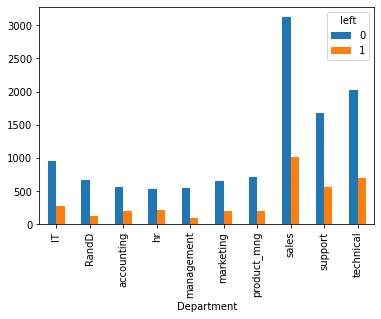

In [37]:
#Department wise employee retention rate
pd.crosstab(df.Department, df.left).plot(kind='bar')

#From above chart there seem to be some impact of department on employee retention 
#but it is not major hence we will ignore department in our analysis

In [38]:
####
###
###From the data analysis so far we can conclude that we will use 
### following variables as independant variables in our model
#1-Satisfaction Level
#2-Average Monthly Hours
#3- Promotion Last 5 Years
#4- Salary

subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years','salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [39]:
#Salary has all text data. It needs to be converted to numbers and we will
#use dummy variables for that.
salary_dummies = pd.get_dummies(df.salary, prefix='salary')
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [44]:
#Concat subdf, salary_dummies
df_with_dummies = pd.concat([subdf,salary_dummies], axis ='columns')

#Drop salary
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [45]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [46]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [47]:
#Lest split our Data
from sklearn.model_selection import train_test_split
X_train,X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3)

In [51]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [52]:
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:

#Accuracy of the model
model.score(X_test,y_test)

0.7793333333333333